In [1]:
#from pyserini.index.lucene import IndexReader
from matplotlib import pyplot as plt
import numpy as np
import json
import h5py

# BM25 index distribution

In [3]:
# load index generated by anserini
index_reader = IndexReader('lucene-index-msmarco/')

NameError: name 'IndexReader' is not defined

In [ ]:
index_reader.stats()

In [ ]:
# check terms and df(document frequency), cf(collection frequency)
import itertools
for term in itertools.islice(index_reader.terms(), 10000):
    print(f'{term.term} (df={term.df}, cf={term.cf})')
    #print(f'{term.term}')

In [ ]:
# Extract df for each term
term_len = []
for term in itertools.islice(index_reader.terms(),352316036):
    term_len.append(term.df)
    #print(f'{term.term} (df={term.df}, cf={term.cf})')
    #print(f'{term.term}')
len(term_len)

In [ ]:
# Sort the list descending order
term_len.sort(reverse=True)

In [ ]:
# BM25 index distribution
plt.plot(range(2660824),term_len)
plt.title('index distribution')
plt.yscale('log')

In [ ]:
# # write the list into file
# with open("test.json","w") as fp:
#     json.dump(term_len, fp)

In [2]:
# load the list into file
with open("BM25_index_dist.json","r") as fp:
    BM25_id = json.load(fp)

In [3]:
len(BM25_id)

2660824

# Splade index distribution

### Cocondenser ensemble distill monoGPU

In [4]:
with open('splade_cd_index_dist.json') as json_file:
    data = json.load(json_file)
 
    # Print the key with the max value
    print(max(data, key= data.get), data[max(data, key= data.get)])


2748 1804955


In [5]:
splade_cd_id = list(data.values())
len(splade_cd_id)

28679

In [6]:
splade_cd_id.sort(reverse=True)

Text(0, 0.5, 'Number of Documents')

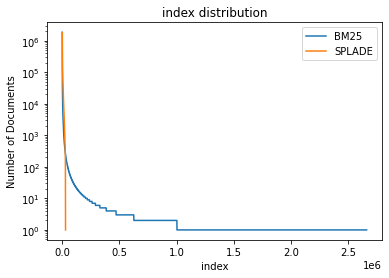

In [7]:
plt.plot(range(len(BM25_id)),BM25_id)
plt.plot(range(len(splade_cd_id)),splade_cd_id)
plt.title('index distribution')
plt.legend(['BM25', 'SPLADE'])
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('index')
plt.ylabel('Number of Documents')

### Splade Efficient 2 index distribution

In [8]:
filename = "efficient2/VI/BT/large/index/array_index.h5py"

In [9]:
def read_hdf5(path):

    weights = {}

    keys = []
    with h5py.File(path, 'r') as f: # open file
        f.visit(keys.append) # append all keys to list
        #print(keys)
        for key in keys:
            #print(f[key].name)
            weights[f[key].name] = f[key][()]
            
    return weights

In [10]:
splade_e2 =  read_hdf5(filename)

In [11]:
splade_e2.keys()

dict_keys(['/dim', '/index_doc_id_0', '/index_doc_id_10000', '/index_doc_id_10001', '/index_doc_id_10002', '/index_doc_id_10003', '/index_doc_id_10004', '/index_doc_id_10005', '/index_doc_id_10006', '/index_doc_id_10007', '/index_doc_id_10008', '/index_doc_id_10009', '/index_doc_id_1001', '/index_doc_id_10010', '/index_doc_id_10011', '/index_doc_id_10012', '/index_doc_id_10013', '/index_doc_id_10014', '/index_doc_id_10015', '/index_doc_id_10016', '/index_doc_id_10017', '/index_doc_id_10018', '/index_doc_id_10019', '/index_doc_id_1002', '/index_doc_id_10020', '/index_doc_id_10021', '/index_doc_id_10022', '/index_doc_id_10023', '/index_doc_id_10024', '/index_doc_id_10025', '/index_doc_id_10026', '/index_doc_id_10027', '/index_doc_id_10028', '/index_doc_id_10029', '/index_doc_id_1003', '/index_doc_id_10030', '/index_doc_id_10031', '/index_doc_id_10032', '/index_doc_id_10033', '/index_doc_id_10034', '/index_doc_id_10035', '/index_doc_id_10036', '/index_doc_id_10037', '/index_doc_id_10038',

In [12]:
# Record the length of the documents in each index
i=0
splade_e2_id = []
for key in splade_e2.keys():
    if '/index_doc_id_' in key:
        i+=1
        splade_e2_id.append(len(splade_e2[key]))

In [13]:
len(splade_e2_id)

28698

In [14]:
splade_e2_id.sort(reverse=True)

Text(0, 0.5, 'Number of Documents')

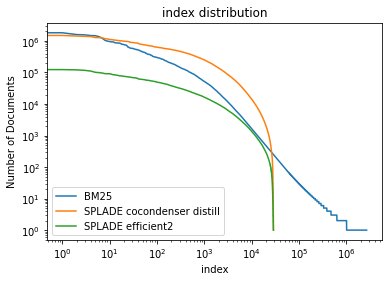

In [15]:
plt.plot(range(len(BM25_id)),BM25_id)
plt.plot(range(len(splade_cd_id)),splade_cd_id)
plt.plot(range(len(splade_e2_id)),splade_e2_id)
plt.title('index distribution')
plt.legend(['BM25', 'SPLADE cocondenser distill', 'SPLADE efficient2'])
plt.yscale('log')
plt.xscale('log')
plt.xlabel('index')
plt.ylabel('Number of Documents')

### cocondenser_1_0.9

In [16]:
# Opening JSON file
with open('cocondenser_1_0.9/index/index_dist.json') as json_file:
    data = json.load(json_file)

splace_c_1_09 = list(data.values())

splace_c_1_09.sort(reverse=True)


### cocondenser_ensemble_distil_monogpu

In [17]:
#cocondenser_ensemble_distil_monogpu
# Opening JSON file
with open('cocondenser_ensemble_distil_monogpu/index/index_dist.json') as json_file:
    data = json.load(json_file)

splace_cedm_id = list(data.values())

splace_cedm_id.sort(reverse=True)

### efficient model

In [18]:

with open('efficient/VI/BT/large/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e1_id = list(data.values())

splade_e1_id.sort(reverse=True)

### efficient 3 model

In [19]:
#cocondenser_ensemble_distil_monogpu_10_10_2
with open('efficient3/V/small/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e3_id = list(data.values())

splade_e3_id.sort(reverse=True)

Text(0, 0.5, 'Number of Documents')

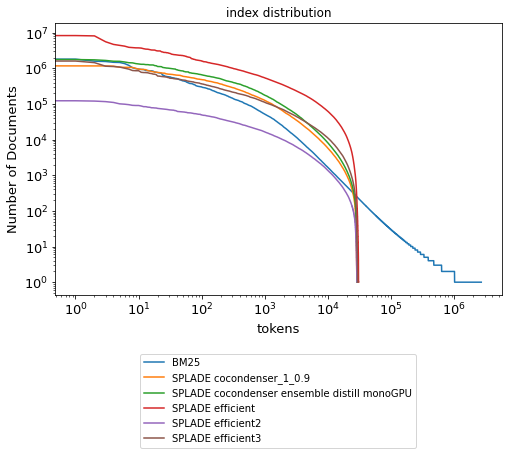

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

plt.plot(range(len(splade_e1_id)),splade_e1_id)
plt.plot(range(len(splade_e2_id)),splade_e2_id)
plt.plot(range(len(splade_e3_id)),splade_e3_id)
plt.title('index distribution')
plt.legend(['BM25', 
            #'SPLADE cocondenser distill', 
            'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            'SPLADE efficient',
            'SPLADE efficient2',
            'SPLADE efficient3'],
           loc='upper center', bbox_to_anchor=(0.5, -0.2))
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

Text(0, 0.5, 'Number of Documents')

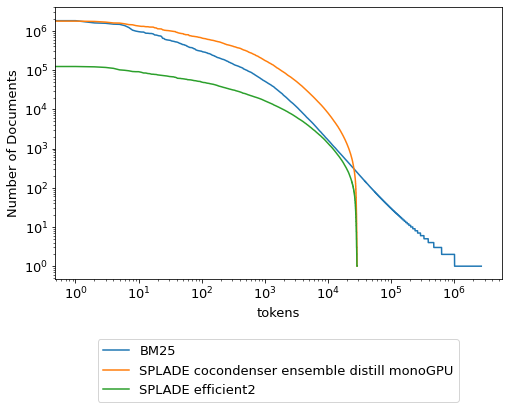

In [21]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
plt.plot(range(len(splade_e2_id)),splade_e2_id)
#plt.plot(range(len(splade_e3_id)),splade_e3_id)
#plt.title('index distribution')
plt.legend(['BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            'SPLADE efficient2',
            #'SPLADE efficient3'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)


Text(0, 0.5, 'Number of Documents')

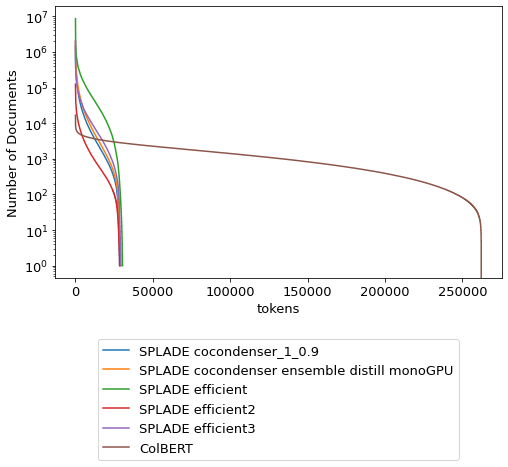

In [33]:
plt.figure(figsize=(8, 5))
#plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

plt.plot(range(len(splade_e1_id)),splade_e1_id)
plt.plot(range(len(splade_e2_id)),splade_e2_id)
plt.plot(range(len(splade_e3_id)),splade_e3_id)
plt.plot(range(len(ColBERT_dist)), ColBERT_dist)
#plt.title('index distribution')
plt.legend([#'BM25', 
            #'SPLADE cocondenser distill', 
            'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            'SPLADE efficient',
            'SPLADE efficient2',
            'SPLADE efficient3',
            'ColBERT'],
           loc='upper center', bbox_to_anchor=(0.5, -0.2),fontsize = 13)
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

### BERT index

In [23]:
with open('BERT_index_lengths.json') as json_file:
    BERT_index = json.load(json_file)

In [24]:
BERT_id = list(BERT_index.values())

In [25]:
BERT_id.sort(reverse=True)

Text(0, 0.5, 'Number of Documents')

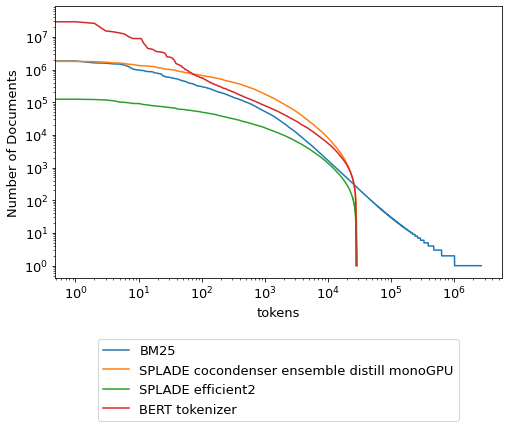

In [26]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
plt.plot(range(len(splade_e2_id)),splade_e2_id)
#plt.plot(range(len(splade_e3_id)),splade_e3_id)
#plt.title('index distribution')
plt.plot(range(len(BERT_id)),BERT_id)

plt.legend(['BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            'SPLADE efficient2',
            #'SPLADE efficient3'
            'BERT tokenizer'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

Text(0, 0.5, 'Number of Documents')

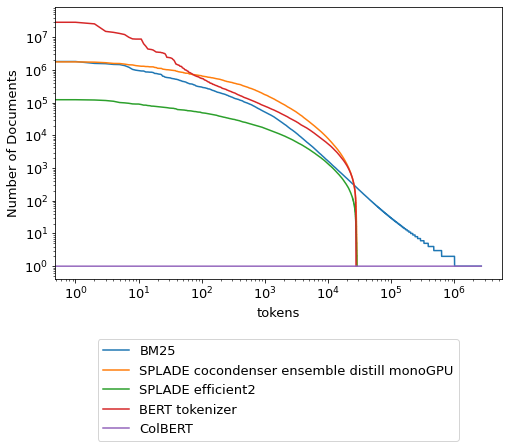

In [27]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
plt.plot(range(len(splade_e2_id)),splade_e2_id)
#plt.plot(range(len(splade_e3_id)),splade_e3_id)
#plt.title('index distribution')
plt.plot(range(len(BERT_id)),BERT_id)
plt.plot(range(len(BM25_id)), np.ones(len(BM25_id)))

plt.legend(['BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            'SPLADE efficient2',
            #'SPLADE efficient3'
            'BERT tokenizer',
            'ColBERT'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

# ColBERT distribution

In [20]:
# # write the list into file
# with open("ColBERT_dist.json","w") as fp:
#     json.dump(ColBERT_dist, fp)

NameError: name 'ColBERT_dist' is not defined

In [28]:
with open("ColBERT_dist.json","r") as fp:
    ColBERT_dist = json.load(fp)

Text(0, 0.5, 'Number of Documents')

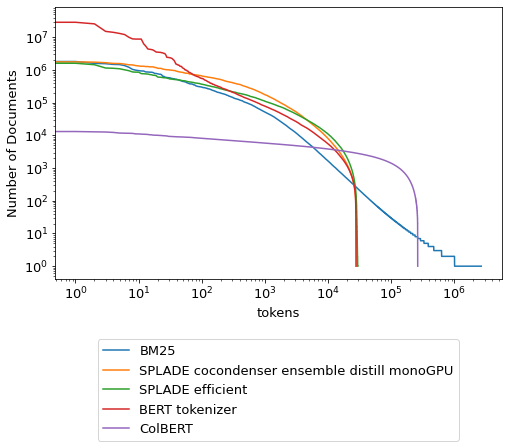

In [29]:
plt.figure(figsize=(8, 5))
plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
#plt.plot(range(len(splade_e2_id)),splade_e2_id)
plt.plot(range(len(splade_e3_id)),splade_e3_id)
#plt.title('index distribution')
plt.plot(range(len(BERT_id)),BERT_id)
plt.plot(range(len(ColBERT_dist)), ColBERT_dist)

plt.legend(['BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            #'SPLADE efficient2',
            'SPLADE efficient',
            'BERT tokenizer',
            'ColBERT'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

Text(0, 0.5, 'Number of Documents')

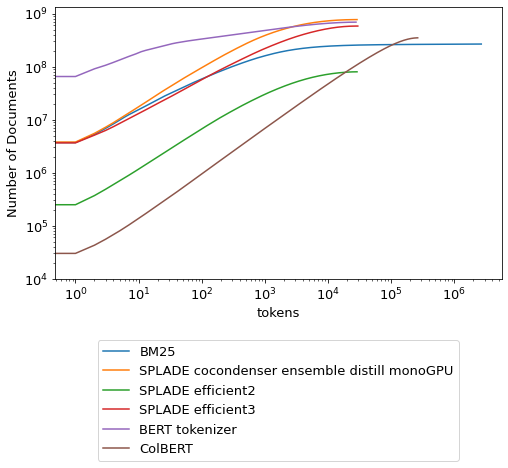

In [30]:
## cumulative sum of the doc listings

plt.figure(figsize=(8, 5))
plt.plot(range(len(BM25_id)),np.cumsum(BM25_id))
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),np.cumsum(splace_cedm_id))

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
plt.plot(range(len(splade_e2_id)),np.cumsum(splade_e2_id))
plt.plot(range(len(splade_e3_id)),np.cumsum(splade_e3_id))
#plt.title('index distribution')
plt.plot(range(len(BERT_id)),np.cumsum(BERT_id))
plt.plot(range(len(ColBERT_dist)), np.cumsum(ColBERT_dist))

plt.legend(['BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            'SPLADE efficient2',
            'SPLADE efficient3',
            'BERT tokenizer',
            'ColBERT'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

In [34]:
ColBERT_dist[:10]

[16832, 13147, 12824, 12703, 12329, 11799, 11695, 11634, 11544, 11111]

In [40]:
ColBERT_dist[-10:]

[3, 3, 3, 3, 3, 2, 2, 2, 2, 1]

Text(0, 0.5, 'Number of Documents')

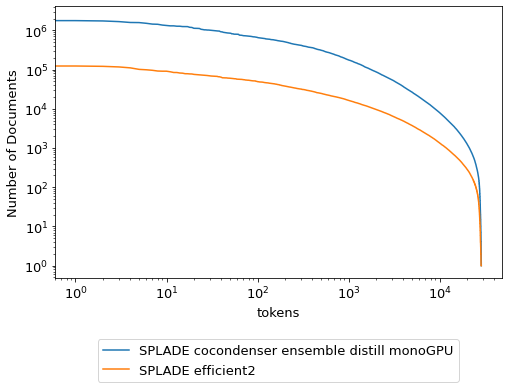

In [22]:
plt.figure(figsize=(8, 5))
#plt.plot(range(len(BM25_id)),BM25_id)
#plt.plot(range(len(splade_cd_id)),splade_cd_id)
#plt.plot(range(len(splace_c_1_09)),splace_c_1_09)
plt.plot(range(len(splace_cedm_id)),splace_cedm_id)

#plt.plot(range(len(splade_e1_id)),splade_e1_id)
plt.plot(range(len(splade_e2_id)),splade_e2_id)
#plt.plot(range(len(splade_e3_id)),splade_e3_id)
#plt.title('index distribution')
#plt.plot(range(len(BERT_id)),BERT_id)
#plt.plot(range(len(ColBERT_dist)), ColBERT_dist)

plt.legend([#'BM25', 
            #'SPLADE cocondenser distill', 
            #'SPLADE cocondenser_1_0.9',
            'SPLADE cocondenser ensemble distill monoGPU',

            #'SPLADE efficient',
            'SPLADE efficient2',
            #'SPLADE efficient3'
            #'BERT tokenizer',
            #'ColBERT'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)

# efficient model Ld 5e-2

In [34]:

with open('/Users/taehoonkang/Documents/MIDS/w210/Neural-Information-Retrieval/splade/models/efficient/V/small_Ld_5e2/index/index_dist.json') as json_file:
    data = json.load(json_file)

splade_e3_Ld5e2 = list(data.values())

splade_e3_Ld5e2.sort(reverse=True)

Text(0, 0.5, 'Number of Documents')

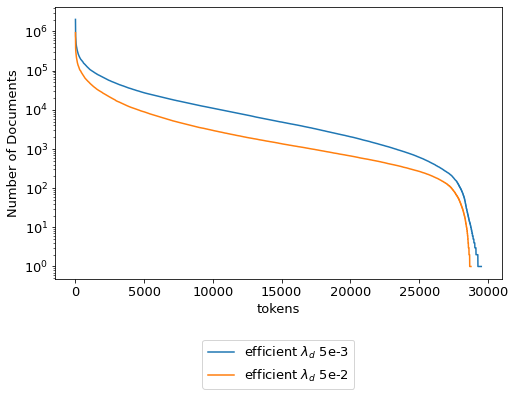

In [38]:
plt.figure(figsize=(8, 5))

plt.plot(range(len(splade_e3_id)),splade_e3_id)
plt.plot(range(len(splade_e3_Ld5e2)),splade_e3_Ld5e2)


plt.legend(['efficient $\lambda_d$ 5e-3',
            'efficient $\lambda_d$ 5e-2'
           ],
           loc='upper center', bbox_to_anchor=(0.5, -0.2), fontsize = 13)
plt.yscale('log')
#plt.xscale('log')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('tokens', fontsize = 13)
plt.ylabel('Number of Documents', fontsize = 13)